# **Importing the Pandas and Numpy for Analysis**

In [59]:
import pandas as pd
import numpy as np

# **Using Chartdet to find the Encoding of the large data**

In [58]:
import chardet
filepath='/content/OnlineRetail.csv'
with open(filepath, 'rb') as file:
    result = chardet.detect(file.read())
    encoding_detected = result['encoding']

print(f"Detected encoding: {encoding_detected}")


Detected encoding: ISO-8859-1


# **Reading the data with character encoding **

 It is a crucial aspect of working with text data, and specifying the correct encoding provides numerous benefits, including accurate character representation, support for special characters, internationalization, compatibility, error prevention, data integrity, and standardization.

In [60]:
data = pd.read_csv("/content/OnlineRetail.csv", encoding='ISO-8859-1', error_bad_lines=False)

<ipython-input-60-20eaafde5e7d>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("/content/OnlineRetail.csv", encoding='ISO-8859-1', error_bad_lines=False)
Skipping line 12305: expected 8 fields, saw 15
Skipping line 37162: expected 8 fields, saw 10

<ipython-input-60-20eaafde5e7d>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/OnlineRetail.csv", encoding='ISO-8859-1', error_bad_lines=False)


# **Data Exploration**

In [61]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [62]:
data.shape

(529623, 8)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529623 entries, 0 to 529622
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    529623 non-null  object 
 1   StockCode    529623 non-null  object 
 2   Description  528175 non-null  object 
 3   Quantity     529623 non-null  int64  
 4   InvoiceDate  529623 non-null  object 
 5   UnitPrice    529623 non-null  object 
 6   CustomerID   398493 non-null  float64
 7   Country      529622 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 32.3+ MB


In [64]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# **Data Handling**

In [65]:
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')

In [66]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d-%m-%Y %H:%M', errors='coerce')


In [67]:
data.dropna(subset=['Description', 'Country'], inplace=True)

In [68]:
data.fillna({'CustomerID': 0}, inplace=True)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528174 entries, 0 to 529622
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    528174 non-null  object        
 1   StockCode    528174 non-null  object        
 2   Description  528174 non-null  object        
 3   Quantity     528174 non-null  int64         
 4   InvoiceDate  528174 non-null  datetime64[ns]
 5   UnitPrice    528174 non-null  float64       
 6   CustomerID   528174 non-null  float64       
 7   Country      528174 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.3+ MB


# **Descriptive Analysis**

In [70]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,528174.000000,528174.000000,528174.000000
mean,9.603657,4.627061,11531.203183
std,220.456471,97.949604,6744.736811
min,-80995.000000,-11062.060000,0.000000
25%,1.000000,1.250000,12383.000000
50%,3.000000,2.080000,14390.000000
75%,10.000000,4.130000,16265.000000
max,80995.000000,38970.000000,18287.000000


# **Importing Libraries to train Kmeans Clustering Model**

In [71]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# **Feature Selection and Standardization**

In [72]:
# Selecting relevant columns for clustering
X = data[['Quantity', 'UnitPrice']]

In [73]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Elbow Method to find Optimal CLusters**

In [74]:
# This involves fitting KMeans models with different values of k and plotting the inertia (within-cluster sum of squares)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

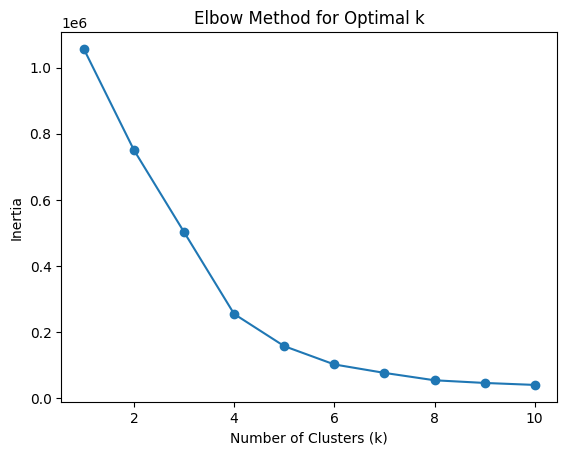

In [75]:
# Plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# **Elbow at k=4**

In [76]:
# Elbow method,for choosing the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Inspecting the results**

In [77]:
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['Quantity', 'UnitPrice'])
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
       Quantity    UnitPrice
0      9.604341     4.056212
1 -77605.000000     1.560000
2     -0.806452  9730.436452
3  77605.000000     1.560000


# **Visualizations for Analysis**

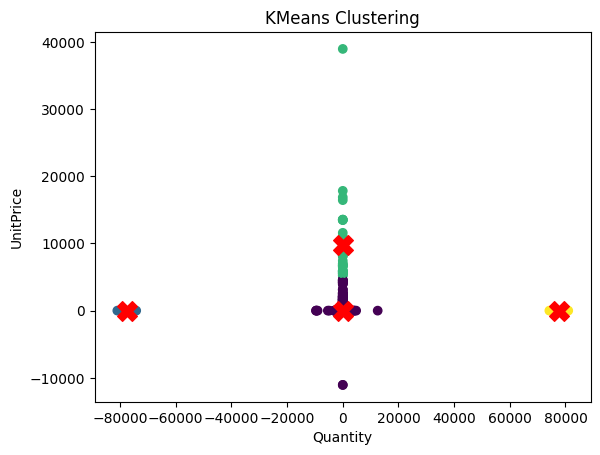

In [78]:
# Visualizing the clusters between 'Quantity'and 'UnitPrice'
plt.scatter(X['Quantity'], X['UnitPrice'], c=data['Cluster'], cmap='viridis')
plt.scatter(cluster_centers['Quantity'], cluster_centers['UnitPrice'], marker='X', c='red', s=200)
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('KMeans Clustering')
plt.show()

# **Models Inertia **
The inertia is minimized for a reasonable number of clusters

In [79]:
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")

Inertia: 255018.90972975446


# **Evaluation**

In [80]:
import pandas as pd

# Sample new data with the same features as  original data
new_data = pd.DataFrame({
    'Quantity': [10, 5, 15],
    'UnitPrice': [3.0, 2.5, 4.0]
})

# scaling the new data similarly
new_data_scaled = scaler.transform(new_data)

# Trained KMeans model to predict clusters for the new data
new_data['Cluster'] = kmeans.predict(new_data_scaled)

print(new_data)


   Quantity  UnitPrice  Cluster
0        10        3.0        0
1         5        2.5        0
2        15        4.0        0


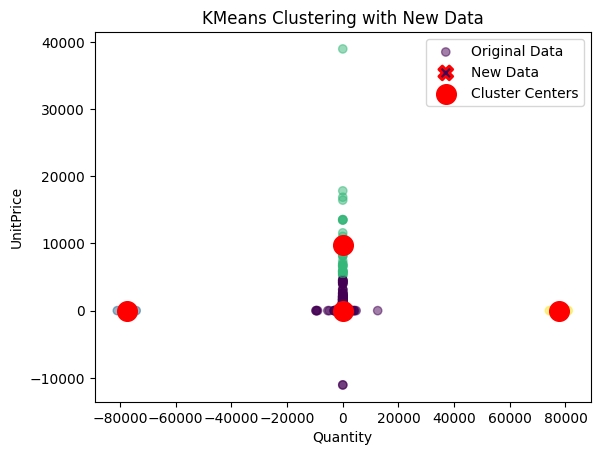

In [81]:
# Scatter plot of the original data points
plt.scatter(X['Quantity'], X['UnitPrice'], c=data['Cluster'], cmap='viridis', alpha=0.5, label='Original Data')

# Scatter plot of the new data points with cluster assignments
plt.scatter(new_data['Quantity'], new_data['UnitPrice'], c=new_data['Cluster'], marker='X', s=100, edgecolors='red', linewidths=2, label='New Data')
plt.scatter(cluster_centers['Quantity'], cluster_centers['UnitPrice'], marker='o', c='red', s=200, label='Cluster Centers')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('KMeans Clustering with New Data')
plt.legend()
plt.show()

# **END**

# **Saving the Model**

In [82]:
import joblib
model_filename = 'kmeans_model.joblib'

# Save the model to a file
joblib.dump(kmeans, model_filename)

print(f"Model saved to {model_filename}")


Model saved to kmeans_model.joblib
